In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from linear_regression import LinearRegression
import scipy.stats as stats
from scipy.special import erfinv
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv", delimiter=";")
X = df["Angle"]
y = df["Distance"]

Text(0, 0.5, 'Distance')

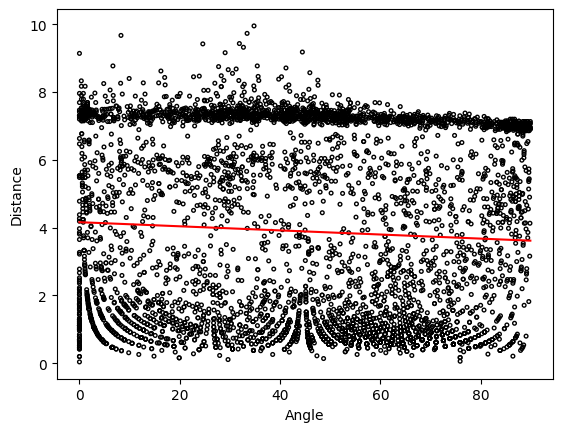

In [3]:
lr = LinearRegression()
lr.build(X, y)
b = lr.betas
plt.scatter(X, y, marker="o", facecolor="none", edgecolors="black", s=7)
space = np.linspace(np.min(X), np.max(X))
Y = b[0]*space + b[1]
plt.plot(space, Y, color="r")
plt.xlabel("Angle")
plt.ylabel("Distance")

# QUANTILE RESIDUALS

0   -2.984035
1   -2.970870
2    3.372999
3   -0.031571
4    3.225849
5   -2.703824
6   -3.300207
7   -3.180674
8   -2.872305
9   -3.170238
Name: Distance, dtype: float64


((array([-3.63692208, -3.40167743, -3.27202625, ...,  3.27202625,
          3.40167743,  3.63692208]),
  array([-1.49002939, -1.43218204, -1.43218204, ...,  2.00979246,
          2.08654492,  2.16910741])),
 (0.9208885491939715, 5.014128764360999e-16, 0.9202767920847318))

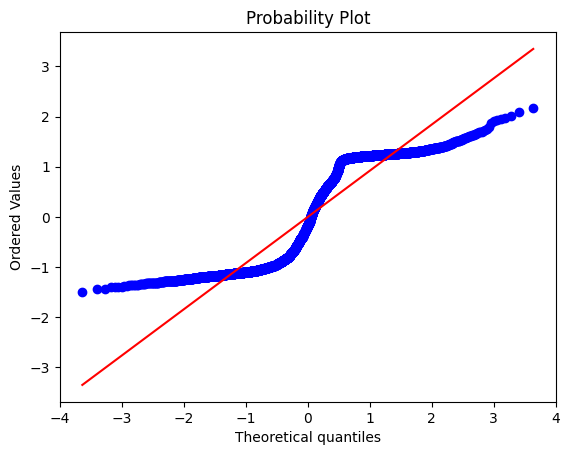

In [4]:
predictions = lr.predict(X)
residuals = y - predictions
print(residuals[0:10])
s = np.std(residuals)

quantile_residuals = residuals/s
fig, ax = plt.subplots()
stats.probplot(quantile_residuals, plot=ax)

Text(0, 0.5, 'Sample Quantiles')

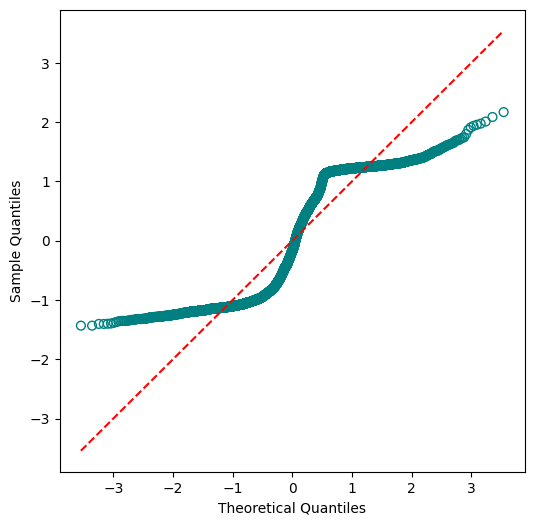

In [20]:
sorted_residuals = np.sort(quantile_residuals)
n = len(sorted_residuals)
probabilities = (np.arange(0, n)) / n
theoretical_quantiles = np.sqrt(2) * erfinv(2 * probabilities - 1)
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, sorted_residuals, edgecolor='teal', facecolor="none", marker="o", s=40)
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle="--")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Residuals vs fitted values

2.7667262283161547 2.7659000521483343


<Axes: ylabel='Distance'>

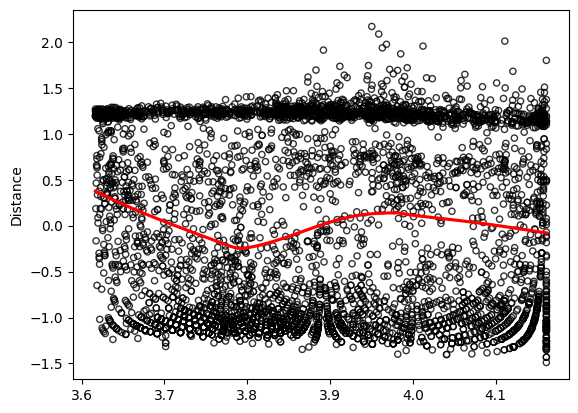

In [23]:
predictions = lr.predict(X)
residuals = y - predictions
sigma_hat = np.sqrt(np.sum(residuals**2) / (n - 2 - 1))
std = np.std(residuals)
print(sigma_hat, std)
pearson_residuals = residuals/sigma_hat
# h = np.diag(lr.hat_matrix)
# r = quantile_residuals/np.sqrt((1-h))
sns.regplot(x=predictions, y=pearson_residuals, lowess=True, scatter_kws={'s': 20, 'color':"black", "facecolor":"None"}, line_kws={'color': 'red'})

# Implementing Cook's distance from the workbook (not the weirdly written chapter 8)

0     2.543991e-04
1     1.651236e-04
2     1.573458e-04
3     3.705729e-08
4     1.772170e-04
5     1.436715e-04
6     1.456806e-04
7     2.026243e-04
8     1.541996e-04
9     1.367769e-04
10    1.728018e-04
11    1.720465e-04
12    1.914524e-04
13    2.026243e-04
14    4.568119e-04
Name: Distance, dtype: float64


<BarContainer object of 5024 artists>

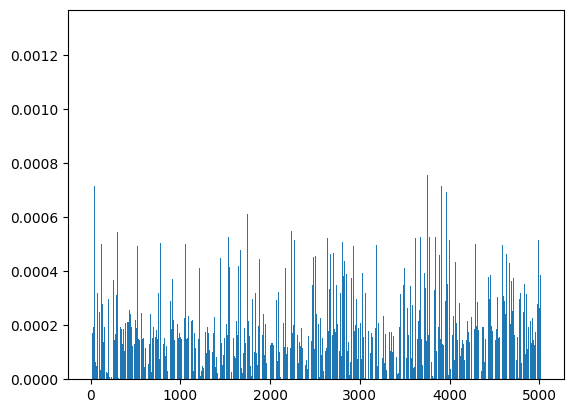

In [7]:
k = len(predictions)
MSE = np.sum(residuals**2)/k
h = np.diag(lr.hat_matrix)
D = (residuals**2 / (2*(MSE))) * (h / ((1 - h))**2)
print(D[0:15])
plt.bar(range(k), D)
#I think this is very wrong

In [8]:
max(D)

0.00130196148184772